# Preguntas 11 y 12

# Regresion Lineal

In [82]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data = pd.read_csv("./data/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [84]:
feature_cols = ["TV", "Radio", "Newspaper"]
X = data[feature_cols]
y = data["Sales"]

In [85]:
x1 = X[["TV"]]
x2 = X[["Radio"]]
x3 = X[["Newspaper"]]

11.  Nuestro target es la columna 'Sales'. ¿Cuál de los tres productos de comunicación posee un menor ajuste lineal respecto a dicha variable?

    1. x1 = TV
    2. x2 = Radio
    3. x3 = Newspaper

In [86]:
product_r2 = {}

for product in X:
    model = LinearRegression()
    model.fit(data[[product]], data['Sales'])
    r2 = model.score(data[[product]], data['Sales'])
    product_r2[product] = r2
    print(r2)

product_with_lowest_r2 = min(product_r2, key=product_r2.get)
print(product_with_lowest_r2)

0.611875050850071
0.33203245544529525
0.05212044544430516
Newspaper


12. Al generar un modelo de regresión lineal múltiple con x1, x2 y x3 se logra una bondad de ajuste (R2) en el intervalo: 1 punto

    - Menor a 0.70

    - (0.70, 0.80]

    - (0.80, 0.90]

    - Mayor a 0.90

- 3


In [87]:
regression_multiple = LinearRegression()
regression_multiple.fit(X, y)
r_squared_multiple = regression_multiple.score(X, y)
print(f"Regression multiple: {r_squared_multiple}")

Regression multiple: 0.8972106381789522


# Feature engineer Pregunta 13

In [88]:
df = pd.read_csv("./data/insurance.csv") 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


* Remover registros duplicados

* Ver si hay valores nulos y eliminarlos

* Quitar la columna region

* Genere variables dummies (binarias) para el género de la persona y si es fumador o no, pensando en añadirlas posteriormente como variables independientes para explicar "charges".

In [89]:
df.drop_duplicates(inplace=True)
df.drop('region', axis=1, inplace=True)
gender_dummies = pd.get_dummies(df['sex'], prefix='sex')
smoker_dummies = pd.get_dummies(df['smoker'], prefix='smoker')
df = pd.concat([df, gender_dummies, smoker_dummies], axis=1)
df.head()

,age,sex,bmi,children,smoker,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19.0,female,27.900,0,yes,16884.92400,1,0,0,1
1,18.0,male,33.770,1,no,1725.55230,0,1,1,0
2,28.0,male,33.000,3,no,4449.46200,0,1,1,0
3,33.0,male,22.705,0,no,21984.47061,0,1,1,0
4,32.0,male,28.880,0,no,3866.85520,0,1,1,0


13. Utilizando como variable dependiente "charges" y el resto de las variables presentes en el dataframe (exceptuando "region") como variables independientes, ¿Cuál es el intercepto del modelo? (redondee al entero más cercano)

- 

In [90]:
from sklearn.preprocessing import OneHotEncoder

X = df.drop(['charges', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes'], axis=1)
y = df['charges']

model = LinearRegression()
model.fit(X, y)

intercepto = model.intercept_

print(intercepto)

ValueError: could not convert string to float: 'female'

## Correlacion de columnas Pregunta 14

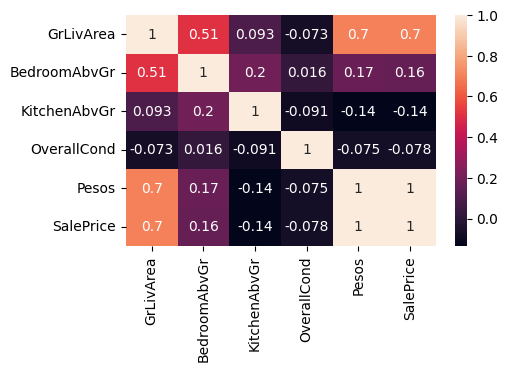

In [ ]:
df = pd.read_csv("./data/ML_Houses_dataset.csv")
df_houses = df[['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 
                       'Pesos', 'Alley', 'Street', 'WallMat','SalePrice']]
                       
corr = df_houses.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

14. Considerando la correlación de Pearson y que la variable objetivo es SalePrice ¿Usted eliminaría alguna de estas variables?

    1. Sí, la variable GrLivArea

    1. Sí, la variable BedroomAbvGr

    1. Sí, la variable OverallCond

    1. Sí, la variable Pesos

    1. No hay suficiente información

- 4, pesos

# Clasificacion Pregunta 15

In [ ]:
df_houses['SalePriceBinary'] = pd.cut(x = df_houses['SalePrice'],
                                        bins=[df_houses['SalePrice'].min()-1,
                                        df_houses['SalePrice'].mean(),
                                        df_houses['SalePrice'].max()+1], 
                                        labels=['barato', 'caro'])

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

y_encoder = LabelEncoder().fit(df_houses['SalePriceBinary'])
y = y_encoder.transform(df_houses['SalePriceBinary'])
X = df_houses.drop(columns=['Alley','Street','WallMat', 'SalePrice', 'Pesos', 'SalePriceBinary'])

X_scaled = MinMaxScaler().fit_transform(X)

Después de efectuado el procedimiento anterior, se pide utilizar validación cruzada, con cv=10 y aplicar árboles de decisión

15.  ¿En qué rango se encuentra el accuracy del modelo? 

    1. [0.65 , 0.7)
    2. [0.7 , 0.8)
    3. [0.8 , 0.9)
    4. [0.9 , 0.95]
    5. Menor a 0.65 o mayor a 0.95

- 3

In [ ]:
performance = {}

for cv in range(2,22):
    tree = DecisionTreeClassifier()
    scores = cross_val_score(tree, X_scaled, y, cv=cv)
    # print(cv, scores.min(), scores.mean(), scores.max())
    print(cv, round(scores.min(), 3), round(scores.max(), 3))

tree = DecisionTreeClassifier()
score = cross_val_score(tree, X_scaled, y, cv=10)
minAccuracy = min(score)
meanAccuracy = score.mean()
maxAccuracy = max(score)

print('min:', minAccuracy)
print('mean:', meanAccuracy)
print('max:', maxAccuracy)

2 0.841 0.847
3 0.825 0.892
4 0.836 0.927
5 0.812 0.957
6 0.823 0.983
7 0.821 0.984
8 0.827 0.982
9 0.811 0.979
10 0.818 0.983
11 0.8 0.981
12 0.816 0.979
13 0.816 0.993
14 0.786 0.992
15 0.812 0.991
16 0.818 0.991
17 0.798 0.99
18 0.806 0.99
19 0.785 1.0
20 0.807 1.0
21 0.762 1.0
min: 0.8181818181818182
mean: 0.8585227272727274
max: 0.9829545454545454


# Metricas Pregunta 16

16. ¿Cuál sería el valor de la exhaustividad del modelo? 

    1. 0.625
    2. 0.833
    3. 0.692
    4. 0.714

- 2

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

# mi codigo;
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")


recall = recall_score(y_true, y_pred)
print('Recall:', recall)


Accuracy: 0.69
Recall: 0.8333333333333334


# Ajustando Metricas Pregunta 17

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_test = [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

cm = confusion_matrix(y_test, y_pred)
print(cm)
false_positives = cm[0, 1]
print(f"False Positives: {false_positives}")

[[4 3]
 [1 5]]
False Positives: 3


# K-means Pregunta 18

18. Si en el conjunto entregado, instancia y entrena un modelo KMeans con dos clústeres, el valor de la inercia, estaría en el rango de: 

    1. (0, 10000]

    1. (10000, 20000]

    1. (20000, 30000]

    1. Mayor a 30000

- 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
random_state=42

X, y = make_blobs(n_samples=500, centers=4, random_state=random_state)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=random_state)
kmeans.fit(X)

inertia = kmeans.inertia_

ranges = [
    (0, 10000),
    (10000, 20000),
    (20000, 30000),
    (30000, float('inf'))
]

range_index = None
for i, (lower, upper) in enumerate(ranges):
    if lower < inertia <= upper:
        range_index = i
        break

if range_index is not None:
    print("ranges[range_index])
else:
    print("No se encuentra en ninguno de los rangos especificados.")

SyntaxError: unterminated string literal (detected at line 20) (288612197.py, line 20)

# SVM + Grid Search Pregunta 19 

19. ¿Cuáles son los mejores hiperparámetros para la SVM?

    1. {'C': 1, 'coef0': 0, 'gamma': 1, 'kernel': 'rbf'}

    1. {'C': 0.01, 'coef0': 0, 'gamma': 1, 'kernel': 'sigmoid'}

    1. {'C': 0.1, 'coef0': 0, 'gamma': 1, 'kernel': 'rbf'}

    1. {'C': 1, 'coef0': 0, 'gamma': 1, 'kernel': 'sigmoid'}

- 1

Los mejores hiperparámetros encontrados son: {'C': 1, 'coef0': 0, 'gamma': 1, 'kernel': 'rbf'}
La puntuación correspondiente a los mejores hiperparámetros es: 0.9350972410673903


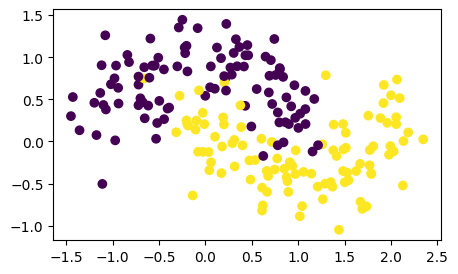

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (5, 3)

from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from scipy import stats

n = 200
X, y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)

# Instanciar el modelo
model = SVC()

# Definir el espacio de búsqueda de hiperparámetros
search_space = {
    'kernel': ['sigmoid', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0, 0.1, 1, 10, 100],
    'coef0': [0, 0.1, 1],
}

# Instanciar la búsqueda de hiperparámetros (GridSearchCV)
rsearch = GridSearchCV(
    model, search_space,
    n_jobs=-1, scoring='accuracy', cv=3, verbose=0)

# Ajustar la búsqueda de hiperparámetros
rsearch.fit(X, y)

# Obtener los mejores hiperparámetros y su puntuación
best_params = rsearch.best_params_
best_score = rsearch.best_score_

# Imprimir los mejores hiperparámetros y su puntuación
print("Los mejores hiperparámetros encontrados son:", best_params)
print("La puntuación correspondiente a los mejores hiperparámetros es:", best_score)


20.   ¿La cantidad de covariables m que se utilizan en la construcción de un árbol, dentro del RandomForest, es un hiperparámetro?, de ser así ¿cuál de las siguientes estrategias permitiría identificar apropiadamente el valor de m?

    1. El número de covariables m no es un hiperparámetro, y su valor es calculado como la raíz del número de covariables.
    2. El número de covariables m no es un hiperparámetro, y su valor siempre es igual a 5, independiente del número de covariables en el conjunto de datos.
    3. El número de covariables m sí es un hiperparámetro, pero no puede ser obtenido mediante validación cruzada, si no que se debe proponer por el usuario.
    4. El número de covariables m sí es un hiperparámetro y puede ser obtenido mediante validación cruzada considerando una grilla para dicho valor, seleccionando aquel que minimice la función de riesgo (error del modelo) escogida.

- 4